--- Data Head ---
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

--- Cluster Centers ---
[[3.84726368e+01 9.69253731e+04]
 [3.68291457e+01 4.22864322e+04]]

--- Clustered Data ---
    User ID  Gender  Age  EstimatedSalary  Purchased  Cluster
0  15624510       1   19            19000          0        1
1  15810944       1   35            20000          0        1
2  15668575       0   26            43000          0        1
3  15603246       0   27            57000          0        1
4  15804002       1   19            76000          0        0


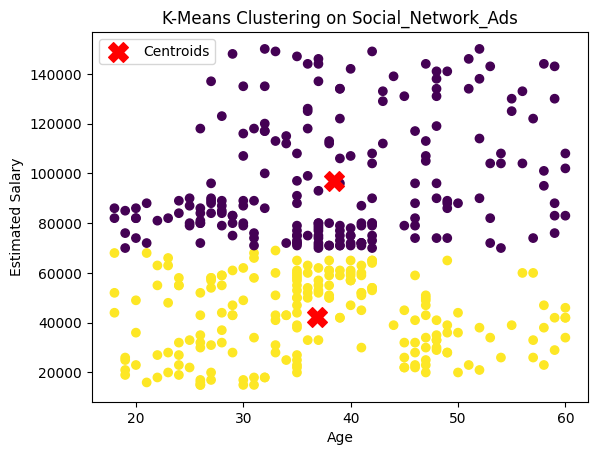

In [1]:
# --- Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# --- (a) Load Dataset ---
df = pd.read_csv("Social_Network_Ads.csv")
print("--- Data Head ---")
print(df.head())

# --- (b) Data Preprocessing ---
# Encode Gender (Male/Female → 0/1)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Select features for clustering
X = df[['Age', 'EstimatedSalary']]

# --- (c) Apply K-Means Clustering ---
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# --- (d) Display Results ---
print("\n--- Cluster Centers ---")
print(kmeans.cluster_centers_)
print("\n--- Clustered Data ---")
print(df.head())

# --- (e) Visualization ---
plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering on Social_Network_Ads")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()
